### Visualization for the original, balanced and unbalanced target distribution.

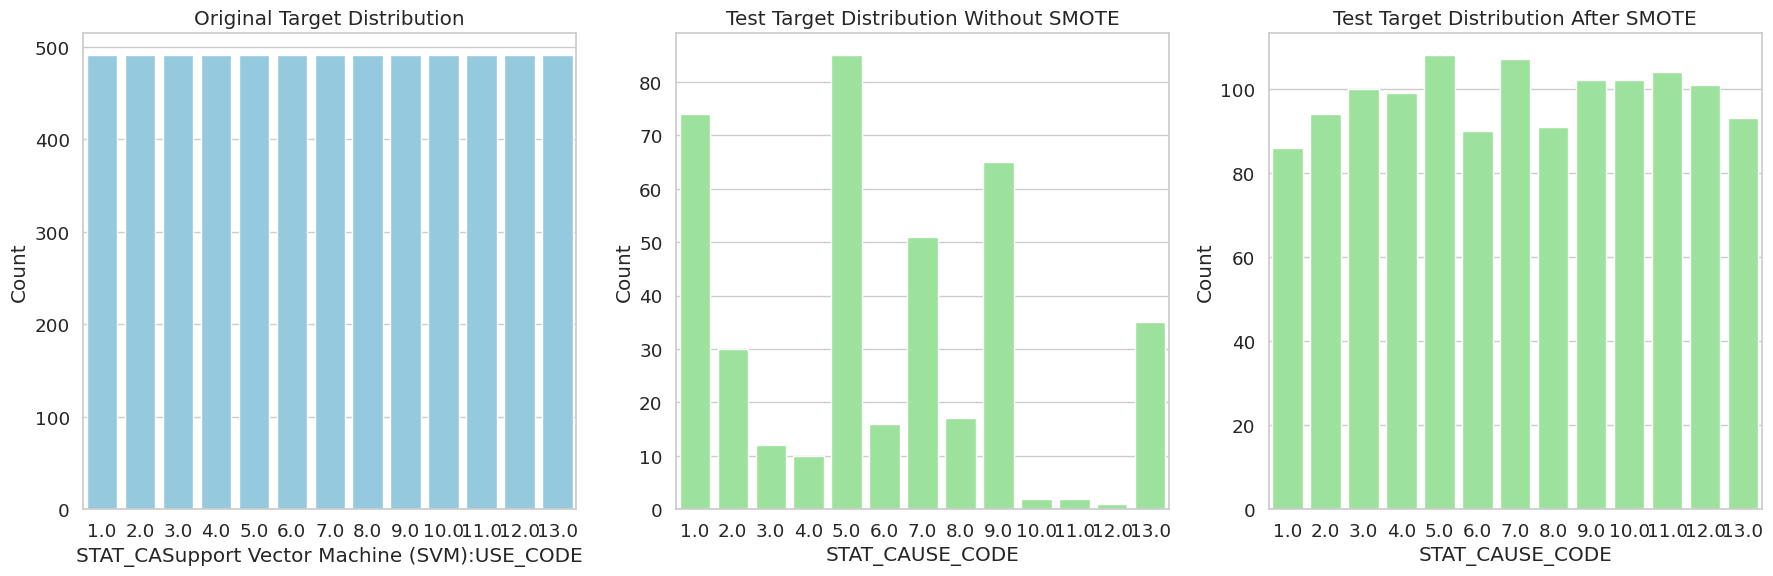

In [40]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

_, y_original, y_test, y_preds = joblib.load("pickle_files/class_balance_results.pkl")
_, _, y_test_wc, _ = joblib.load("pickle_files/no_balance_results.pkl")


def visualize_results(y_original, y_test):
    sns.set(style="whitegrid", palette="muted", font_scale=1.2)

    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_original, color='skyblue')
    plt.title('Original Target Distribution')
    plt.xlabel('STAT_CASupport Vector Machine (SVM):USE_CODE')
    plt.ylabel('Count')

    plt.subplot(1, 3, 2)
    sns.countplot(x=y_test_wc, color='lightgreen')
    plt.title('Test Target Distribution Without SMOTE')
    plt.xlabel('STAT_CAUSE_CODE')
    plt.ylabel('Count')

    plt.subplot(1, 3, 3)
    sns.countplot(x=y_test, color='lightgreen')
    plt.title('Test Target Distribution After SMOTE')
    plt.xlabel('STAT_CAUSE_CODE')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

visualize_results(y_original, y_test)


### Visualization for all of the models.

/tmp/ipykernel_38124/1055268854.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


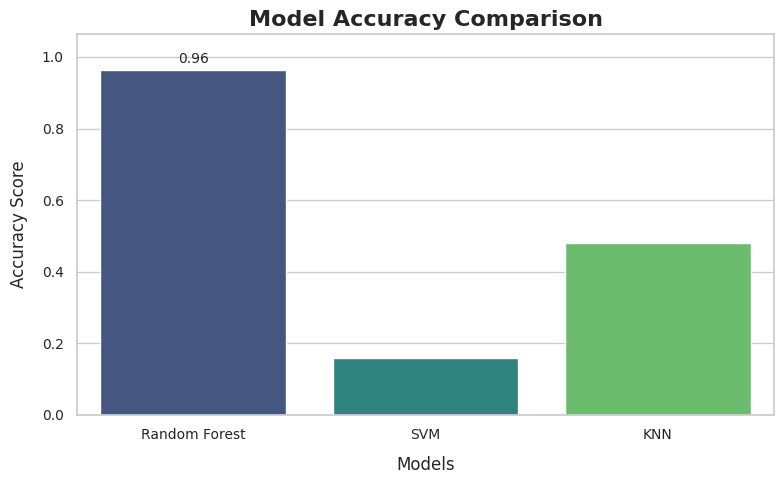

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

def plot_model_accuracies(y_preds, y_test, model_key_mapping, output_file="accuracy_comparison_plot.png"):
    accuracy_scores = {}
    for display_name, pred_key in model_key_mapping.items():
        if pred_key not in y_preds:
            raise KeyError(f"Key '{pred_key}' not found in y_preds.")
        y_pred = y_preds[pred_key]
        accuracy_scores[display_name] = accuracy_score(y_test, y_pred)

    sns.set_theme(style="whitegrid")

    _, ax = plt.subplots(figsize=(8, 5))
    colors = sns.color_palette("viridis", len(accuracy_scores))

    sns.barplot(
        x=list(accuracy_scores.keys()),
        y=list(accuracy_scores.values()),
        palette=colors,
        ax=ax
    )

    ax.set_title("Model Accuracy Comparison", fontsize=16, fontweight="bold")
    ax.set_ylabel("Accuracy Score", fontsize=12, labelpad=10)
    ax.set_xlabel("Models", fontsize=12, labelpad=10)
    ax.set_ylim(0, max(accuracy_scores.values()) + 0.1) 
    ax.bar_label(ax.containers[0], fmt="%.2f", padding=3, fontsize=10)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()

    plt.savefig(output_file, dpi=300)
    plt.show()

model_key_mapping = {
    "Random Forest": "RandomForest",
    "SVM": "SVM",
    "KNN": "KNN"
}

plot_model_accuracies(y_preds, y_test, model_key_mapping)
